# Basics of logistic regression


## Import the relevant libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
raw_data = pd.read_csv('../data/2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Variables

독립변수와 종속변수를 확인한다.  
로지스틱 회귀는 기본적으로 종속변수가 이항인 모형이다.

In [4]:
# Create the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

읽어들인 데이터의 산점도를 그려본다.

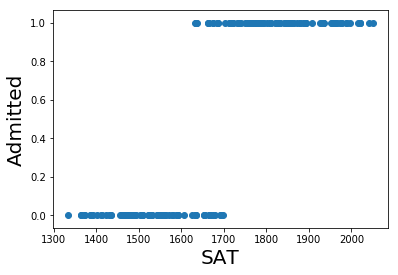

In [5]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression line

종속변수가 이항인 데이터에 대해 선형회귀 모형을 적용하여 확인해 보자.

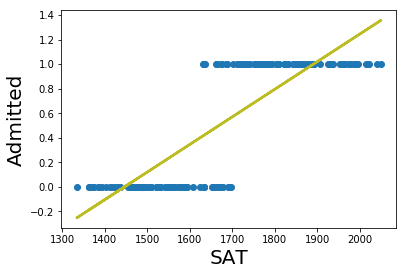

In [6]:
reg = LinearRegression()
X = x1.values.reshape(-1,1)
reg.fit(X,y)

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = reg.coef_*X + reg.intercept_
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot a logistic regression curve

In [7]:
model_sk = LogisticRegression(solver='liblinear',C=100).fit(X, y)

In [8]:
print(model_sk.intercept_, model_sk.coef_)

[-30.55733617] [[0.01842716]]


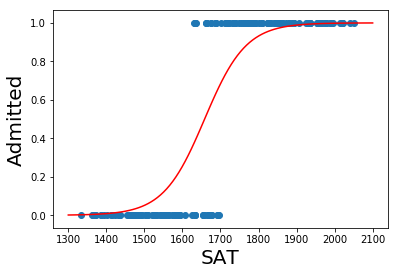

In [9]:
xx = np.linspace(1300, 2100,100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(xx,mu,'r')
plt.show()

### 예측

새로운 값으로 예측을 수행한다.

In [10]:
model_sk.predict([[1520]])

array([0], dtype=int64)

In [11]:
model_sk.predict([[1980]])

array([1], dtype=int64)

### 모델의 분류 성능을 평가

confusion matrix는 데이터의 분류범주와 모형의 예측범주가 일치하는지 결과표로 나타낸다.

In [12]:
from sklearn.metrics import confusion_matrix

pred = model_sk.predict(X)

confusion = confusion_matrix(y, pred)

print("오차행렬: \n{}".format(confusion))

오차행렬: 
[[66  8]
 [ 4 90]]


### 분류기의 정확도 평가

In [13]:
model_sk.score(X, y)

0.9285714285714286

### 규제를 사용하여 과대 적합 방지
LogisticRegression의 파라미터 C는 규제의 정도를 제어한다.  
규제를 사용하여 모형의 복잡도를 조정할 수 있다. 규제는 모형의 훈련과정에서 가중치(계수)를 줄이는 역할을 한다. 

* L1 - 중요한 변수만을 남긴다.(계수가 0이 되는 경우가 있다.)
* L2 - 기본값. 중요하지 않은 변수의 weight값을 0에 가깝게 규제한다.
* LogisticRegression의 penalty의 기본값은 'l2', 'l1'으로 변경가능
* L2 규제 regularization 가중치 감쇠 - ridge
* L1 규제(feature selection)는 가중치를 0으로 만든다.- lasso
* 규제는 다중 공선성 해결에 도움
* 규제는 과대 적합을 방지
* 매개변수 C로 규제의 정도를 제어한다.
* C의 값을 감소하면 규제의 강도가 증가한다. 모형을 단순화하여 과대적합(overfitting)을 방지한다.